# Module 14: Matplotlib

## Introduction

Matplotlib is the most important and widely used plotting library in Python.  

Typically we do not import the entire Matplotlib library, but its submodule `pyplot`.  The standard abbreviation for `pyplot` is `plt`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The following is an equivalent way to import `pyplot`.  Here we've just commented it out.

In [54]:
# from matplotlib import pyplot as plt

There are a few different approaches to plotting in Matplotlib, which make it a little bit challenging to learn.  We are going to focus on what is called the *object-oriented* interface.  We'll see the main alternative, which is called the *state-based* interface, in the next section.

We will use `plt.subplots()` to create the figure in which we will do the plotting.  In the following we define the output to be `z`, but using this variable `z` is not standard.

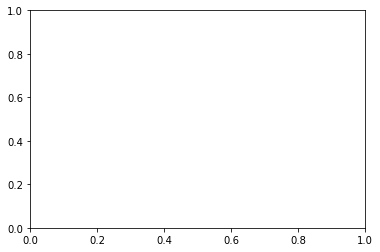

In [55]:
z = plt.subplots()

In [56]:
type(z)

tuple

In [57]:
len(z)

2

In fact, variable `z` is a length-2 tuple, which has two elements. 

* The element `z[0]` is called a `Figure` object in Matplotlib.

* The element `z[1]` is an `Axes` object.  (Aside: notice this word "axes" is spelled with an "e", not with an "i".)

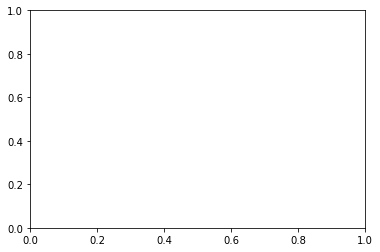

In [58]:
z[0]

In [59]:
type(z[0])

matplotlib.figure.Figure

In [60]:
z[1]

<AxesSubplot:>

In [61]:
type(z[1])

matplotlib.axes._subplots.AxesSubplot

We can also assign these two elements to different variables, what is called "tuple unpacking". 

Here, the resulting figure gets assigned to the variable `fig` and the resulting axes object gets assigned to the variable `ax`.

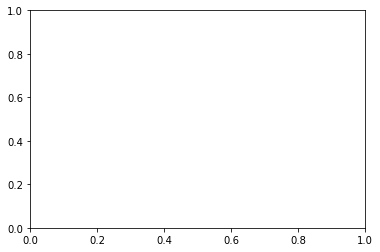

In [62]:
fig, ax = plt.subplots()

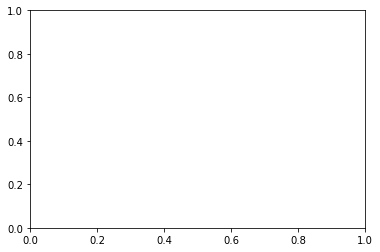

In [63]:
fig

In [64]:
type(fig)

matplotlib.figure.Figure

In [65]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

It's finally time to do some plotting!  We plot by calling the `plot` method of the `Axes` object.  (The fact that we're calling a method of an object, rather than calling another independent function, is called the **"object-oriented" interface.**)

The arguments inside the `plot` are very similar to MATLAB.  The first argument should specify the $x$-coordinates and the next argument should specify the $y$-coordinates.

### Example 1: Plot $y = \cos(x)$ for $x$ from 0 to 6. 

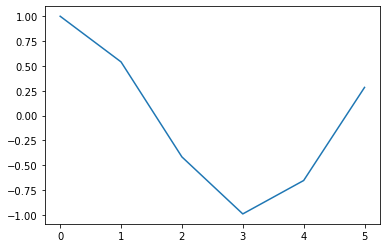

In [66]:
fig, ax = plt.subplots()
ax.plot(range(6), np.cos(range(6)))

We can also set `x = range(6)` and then using `x` instead of `range(6)`.

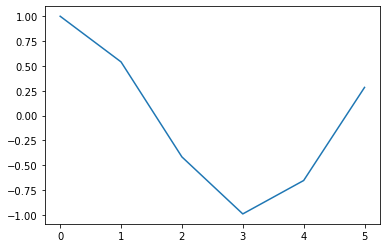

In [67]:
fig, ax = plt.subplots()
x = range(6)
ax.plot(x, np.cos(x))

* **Improvement 1**: We wanted to plot the curve from 0 to 6, but since `range(6)` stops at 5, we should change `range(6)` to `range(7)`.

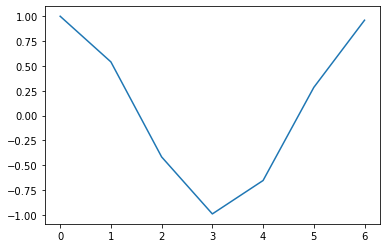

In [68]:
fig, ax = plt.subplots()
x = range(7)
ax.plot(x, np.cos(x))

* **Improvement 2**: The `[<matplotlib.lines.Line2D at 0x1150195a0>]` getting displayed at the top.  We can get rid of that by using a semi-colon `;` after the last line.  (This MIGHT be the only application of semi-colons in Python, unlike MATLAB, where we used semi-colons all the time.)

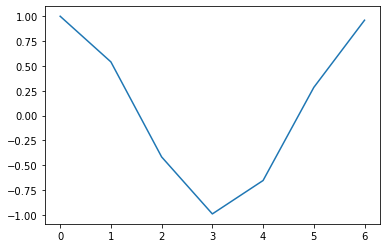

In [69]:
fig, ax = plt.subplots()
x = range(7)
ax.plot(x, np.cos(x));

* **Improvement 3**: Rght now yhe graph doesn't look good, and is so jagged.  This is because we only plotted 7 points and then connecting them with straight lines.  (That's the exact same as using `plot` in MATLAB; the plotted points get connected by straight lines.)  We could try to fix that by using a step size of `0.1`, but we can't use floats inside of `range`.

TypeError: 'float' object cannot be interpreted as an integer

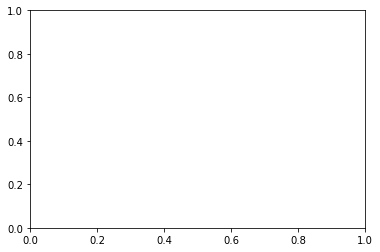

In [70]:
fig, ax = plt.subplots()
x = range(0,6.1,0.1)
ax.plot(x, np.cos(x));

So we should switch to NumPy's `arange` function with stepsize `0.1`, then the graph looks much more smooth.

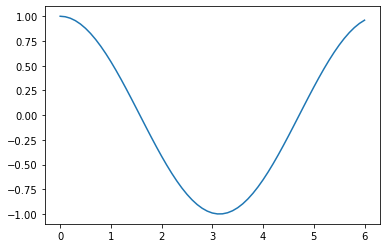

In [71]:
fig, ax = plt.subplots()
x = np.arange(0,6.1,0.1)
ax.plot(x, np.cos(x));

We can also use `np.linspace` to make `x`.  In order to make the curve smooth, we should have more number of points. Let us set the total number of points to 100.  

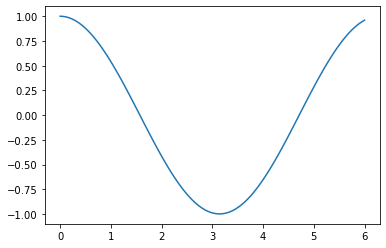

In [72]:
fig, ax = plt.subplots()
x = np.linspace(0,6,100)
ax.plot(x, np.cos(x));

## The two Matplotlib interfaces

> Matplotlib has two interfaces: (1) The **object-oriented (OO) interface**, where we utilize an instance of `axes.Axes` in order to render visualizations on an instance of `figure.Figure`. (2) The second is based on MATLAB and uses a **state-based interface**. **In general, try to use the object-oriented interface.**

In Math 9, we always recommend the object-oriented interface (as we did in the above section).

### The object-oriented interface

In [73]:
import numpy as np
import matplotlib.pyplot as plt

This is a recap of what we did above.  Notice how we are using the `plot` method of `ax`, which is an `Axes` object.

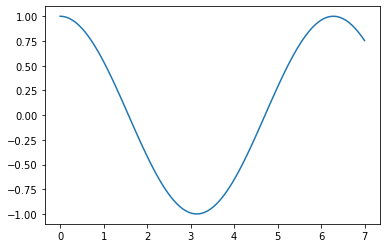

In [74]:
fig, ax = plt.subplots()
x = np.linspace(0,7,100)
ax.plot(x, np.cos(x));

In [75]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

The variable `fig` also represents an object.  (The distinction between `fig` and `ax` might be more clear later, where we have a single `Figure` holding multiple `Axes` objects.)

In [76]:
type(fig)

matplotlib.figure.Figure

### The state-based interface

Based on the online materials, this state-based interface may be used more often, probably because it is more concise.

However, the official Matplotlib documentation also recommends to use the object-oriented interface.  Since the object-oriented interface tends to be more natural as visualizations become more complex.

In the following state-based interface example, `plt.plot` is fairly different from `ax.plot` above.  
* The expression `plt.plot` refers to the `plot` function in the `pyplot` module.  
* The expression `ax.plot` refers to the plot method of the object `ax`.  

Luckily, the arguments passed to `plot` are the same in both cases.

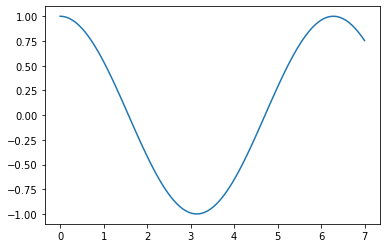

In [77]:
x = np.linspace(0,7,100)
plt.plot(x, np.cos(x));

Notice here the `plot` should be thought of as a function defined in `pyplot`, not as a method associated with a particular object.

In [78]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

We won't do anything more with this state-based approach, but it is good to know it exists so that you can recognize when it is being used.

## Multiple plots

Here we'll see two examples of making multiple plots.

### Example 2: Plot $y = \cos(kx)$ for $k = 1, 2, 3, 5, 7, 10$ between $x = 0$ and $x = 2\pi$ using the following two settings, respectively:
* on a single axes;
* on multiple axes.

In [79]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
𝑘_list = [1,2,3,5,7,10]

**A common mistake**: `pi` is not defined in Python!  Use `np.pi` to get access to $\pi$.

In [81]:
x = np.linspace(0, 2*np.pi, 100)

#### Part 1: Plot the curves on a single axes

To plot the curves on a single axes, we will call the `plot` method on it six times (six iterations).  In each iteration, we use lambda functions to quickly define the six functions we're plotting.  (Be sure to use `k*x` instead of `kx`.) 

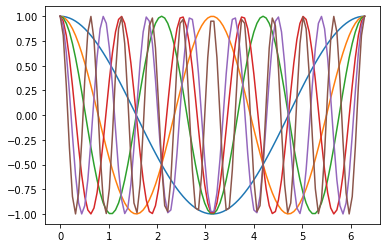

In [82]:
fig, ax = plt.subplots()

for k in k_list:
    # you can also change the variable name of your lambda function to distinguish it from the x defined above
    f = lambda x: np.cos(k*x) 
    y = f(x)
    ax.plot(x,y)

#### Part 2: Plot the curves on different axes.

So far, we've been using `plt.subplots()`, with empty parentheses, but we can also pass some arguments to this `subplots` function.  The name `subplots`, especially the "s" at the end of it, already hints that we can make multiple subplots in a single figure.

In [83]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a column, on

In the following, `plt.subplots(3,2)`, the `3` specifies that there should be **three rows of axes** and the `2` specifies that there should be **two columns of axes**.

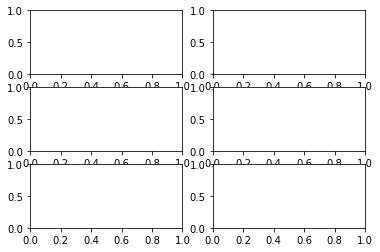

In [84]:
fig, axs = plt.subplots(3,2)

Previously, when we used `fig, ax = plt.subplots()`, the variable `ax` represented an `Axes` object.  Here, where we are using `fig, axs = plt.subplots(3,2)`, the variable `axs` represents a NumPy array. 

In [85]:
type(axs)

numpy.ndarray

The shape of `axs` is `(3,2)`, the same numbers as we passed to `subplots`.  This corresponds to our figure holding a 3-by-2 grid of axes.

In [86]:
axs.shape

(3, 2)

The entries in `axs` are themselves `Axes` objects.  For example, `axs[1,1]` will correspond to the `Axes` object in row 1, column 1 (where we start counting at 0).  We would like to iterate through these six axes objects, and that will be easier to do if we have a "flattened" version of `axs`.  

In [87]:
axs.reshape(-1)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [88]:
axs_flat = axs.reshape(-1)

We can use `axs_flat` to access all the subplots using a single index, with values `0` to `5`.  If we wanted to access for example `axs_flat[4]` using the original two-dimensional NumPy array `axs`, we would have to use two indices, `axs[2,0]`.

In [89]:
axs_flat[4]

<AxesSubplot:>

We can call the `plot` method on these individual `Axes` objects, just like we did in the previous sections.

In [90]:
axs_flat[4].plot([3,1,4])

Notice how `fig` still holds six subplots, and one of these subplots now has a simple line plot drawn on it.  

The `plot` only has one input `[3,1,4]`, so it will be viewed as the $y$-values. Which means we will plot three points, their x-coordinates are `[0,1,2]` and their y-coordinates are `[3,1,4]`.

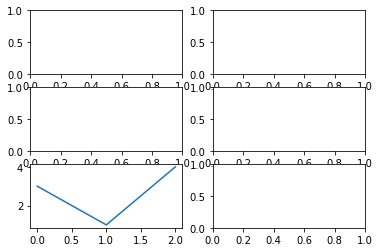

In [91]:
fig

If we tried to access the 4-th element of the original two-dimensional NumPy array `axs`, an error would be raised.  The following is trying to find the 4-th row of `axs`, but `axs` does not have a 4-th row.

In [92]:
axs[4]

IndexError: index 4 is out of bounds for axis 0 with size 3

We need to pair the coefficient `k_list[0]` with the `Axes` object `axs_flat[0]`, and to pair `k_list[1]` with `axs_flat[1]`, and so on.  A straight-forward approach is using a for loop.

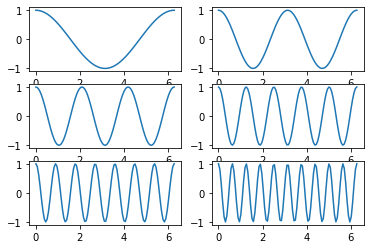

In [93]:
fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for i in range(len(k_list)):
    k = k_list[i]
    ax = axs_flat[i]
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y)

## Replacing `range(len(k_list))`

In the previous section, we used `range(len(k_list))` to get the indices of elements in `k_list`.  It works, but is not the Pythonic way to get these indices.  We will see a better way to get those indices, using the function `enumerate`.

In our specific case, we never use the indices themselves; we only use them to access the corresponding elements in `axs_flat`.  So for our particular use-case here, it is more Pythonic to skip the indices entirely and use `zip`.

We start by copy-pasting the final code form above.

In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
𝑘_list = [1,2,3,5,7,10]

In [96]:
x = np.linspace(0, 2*np.pi, 100)

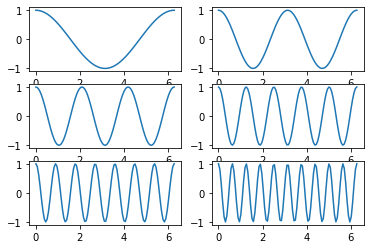

In [97]:
fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for i in range(len(k_list)):
    k = k_list[i]
    ax = axs_flat[i]
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y)

Recall that `k_list` was our (somewhat random) list of coefficients.

In [98]:
k_list

[1, 2, 3, 5, 7, 10]

If we want both the index `i` and the corresponding entry `k`, the most Pythonic approach is to use the function `enumerate`.  

Here is an example with a common mistake:

In [99]:
for i,k in enumerate(k_list):
    print("The value of i is {i}")
    print("The value of k is {k}")

The value of i is {i}
The value of k is {k}
The value of i is {i}
The value of k is {k}
The value of i is {i}
The value of k is {k}
The value of i is {i}
The value of k is {k}
The value of i is {i}
The value of k is {k}
The value of i is {i}
The value of k is {k}


We were using f-string syntax, but we forgot to put the `f` before the quotation marks.

Notice how, for example, the index `i = 4` corresponds to `k = 7` inside of `𝑘_list = [1,2,3,5,7,10]`.

In [100]:
for i,k in enumerate(k_list):
    print(f"The value of i is {i}")
    print(f"The value of k is {k}")

The value of i is 0
The value of k is 1
The value of i is 1
The value of k is 2
The value of i is 2
The value of k is 3
The value of i is 3
The value of k is 5
The value of i is 4
The value of k is 7
The value of i is 5
The value of k is 10


Now that the for loop gives us access to both the index `i` and the corresponding value of `k`, we can remove the `k = k_list[i]` portion of the above code.  Maybe more importantly, we can replace the awkward-looking `range(len(k_list))` portion with the more natural `enumerate(k_list)`.

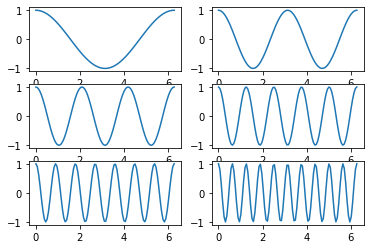

In [101]:
fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for i,k in enumerate(k_list):
    ax = axs_flat[i]
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y)

Because we never actually used the `i` on its own (we only used it to find the corresponding element in `axs_flat`), it is even more Pythonic to use `zip` instead of `enumerate`.

Let's introduce `zip` in an easier example.  What `zip` will do is group the 0-th items together, the 1-st items together, and so on.  For example, in the following, `10` and `4` get grouped together, because `a_list[1]` is `10` and `b_list[1]` is `4`.

In [102]:
a_list = [7,10,2]
b_list = [3,4,5]

for a,b in zip(a_list, b_list):
    print(a,b)

7 3
10 4
2 5


The object actually produced by `zip` is a new type of object (a `zip` object).

In [103]:
zip(a_list, b_list)

In [104]:
type(zip(a_list, b_list))

zip

But we can convert this `zip` object to for example a list, and then it is more clear how to think about `zip(a_list, b_list)`.  The list version is a list of length-2 tuples, where each tuple contains an element from `a_list` and the corresponding element from `b_list`.

In [105]:
list(zip(a_list, b_list))

[(7, 3), (10, 4), (2, 5)]

It's now pretty much effortless to make our six plots using `zip`.  Notice how we are able to remove the line `ax = axs_flat[i]` from the for loop, since `ax` is getting automatically assigned by the for loop statement `for k,ax in zip(k_list, axs_flat):`. 

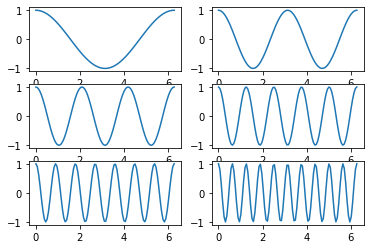

In [106]:
fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax in zip(k_list, axs_flat):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y)

We've now seen three different approaches of making these six plots, one approach using `range`, one approach using `enumerate`, and one approach using `zip`.  All three are important to know, but in this particular example, the `zip` approach is the most Pythonic.

## Adjusting the appearance

The plots we've made so far look pretty old-fashioned in comparison to modern plotting libraries.  This section will be a quick introduction to some of the ways we can adjust the style of our Matplotlib plots.  You can also check out the [Matplotlib example gallery](https://matplotlib.org/stable/gallery/index) to see some beautiful visualizations that can be made using Matplotlib.

In [107]:
import numpy as np
import matplotlib.pyplot as plt

Here is our starting code.  The code itself I think is good; it is the final visualization that I want us to improve.

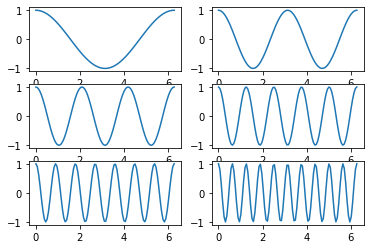

In [108]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax in zip(k_list, axs_flat):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y)

* **Improvement 1**: We will call the `tight_layout` method on the `Figure` object to avoid the overlap.  One interesting thing is that the `tight_layout` will **spread out** the subplots.

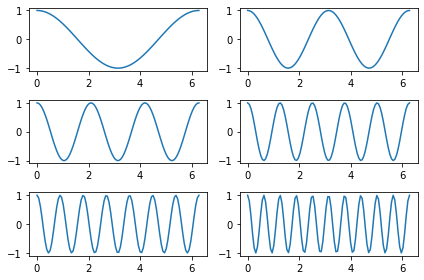

In [109]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax in zip(k_list, axs_flat):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y)
    fig.tight_layout()

Since there is only one `Figure` object in this chart, we do not have to call `fig.tight_layout()` inside the for loop.

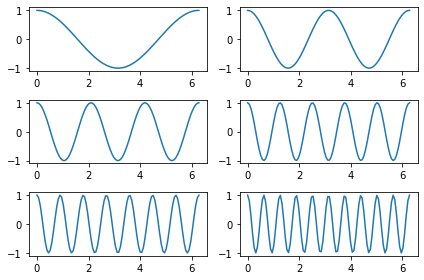

In [110]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax in zip(k_list, axs_flat):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y)

fig.tight_layout()

* **Improvement 2**: We will add a legend to the chart.  We will do this in two steps:  (1) we add a `label` to each of the subplots, using an f-string;  (2) we tell Matplotlib to display the label in a legend, using the `legend` method of the `Axes` object.

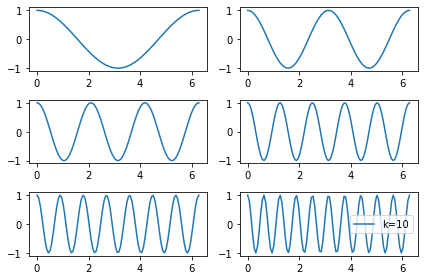

In [111]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax in zip(k_list, axs_flat):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}")

ax.legend()
fig.tight_layout()

Here, each subplot needs its own legend. So we need to call this `legend` method within the for loop.

The following works, but the image looks pretty strange, because the Matplotlib is choosing different default locations for the legend for each of the six subplots.

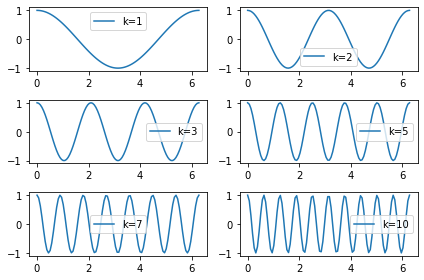

In [112]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax in zip(k_list, axs_flat):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}")
    ax.legend()

fig.tight_layout()

Let's specify that the legend should always be in the upper-right by passing `loc="upper right"` as an argument to the `legend` method.

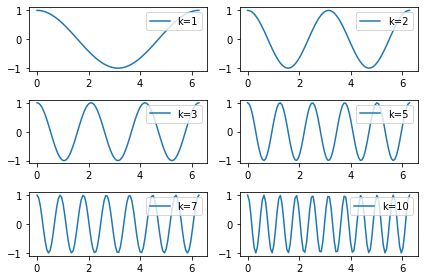

In [113]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax in zip(k_list, axs_flat):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}")
    ax.legend(loc="upper right")

fig.tight_layout()

* **Improvement 3**: Change the color.  

Here we are working with a different submodule, the `colors` submodule.  For now we will just import a single dictionary from `matplotlib.colors`.  The name of `TABLEAU_COLORS` is not very easy to type, so we will give it the abbreviation `tcolors`.  

(Most abbreviations we use in Math 9 are standard, and it would be a mistake to use anything else.  This `tcolors` is an exception; we just made up that abbreviation, and it would be fine to use a different one.)

In [114]:
from matplotlib.colors import TABLEAU_COLORS as tcolors

In [115]:
tcolors

OrderedDict([('tab:blue', '#1f77b4'),
             ('tab:orange', '#ff7f0e'),
             ('tab:green', '#2ca02c'),
             ('tab:red', '#d62728'),
             ('tab:purple', '#9467bd'),
             ('tab:brown', '#8c564b'),
             ('tab:pink', '#e377c2'),
             ('tab:gray', '#7f7f7f'),
             ('tab:olive', '#bcbd22'),
             ('tab:cyan', '#17becf')])

In [116]:
type(tcolors)

collections.OrderedDict

The colors here are the colors used by default in Matplotlib.  For example, if we make two plots on the same axes, the first plot will be in the color "tab:blue" and the second plot will be in the color "tab:orange".

In [117]:
tcolors.keys()

odict_keys(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])

In [118]:
tcolors.values()

odict_values(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

Let's try to get access to these colors.  Read the following error message, can you tell what is wrong in our code cell?

ValueError: too many values to unpack (expected 2)

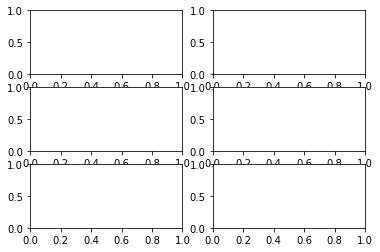

In [119]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax in zip(k_list, axs_flat, tcolors.keys()):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}")
    ax.legend(loc="upper right")

fig.tight_layout()

The problem is that when we do tuple unpacking using for example `k,ax in ...`, there needs to be two values in each tuple, one which will get assigned to `k` and one which will get assigned to `ax`.  When we zip together three different objects, as in `zip(k_list, axs_flat, tcolors.keys())`, then we need to provide three variable names.

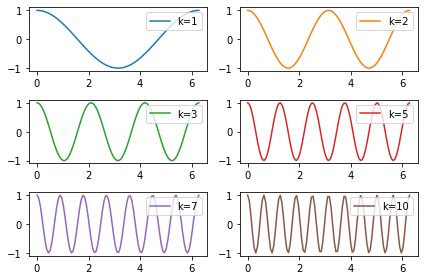

In [120]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax,color in zip(k_list, axs_flat, tcolors.keys()):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}", c=color)
    ax.legend(loc="upper right")

fig.tight_layout()

* **Improvement 4**: Add a title.  There are a few different approaches.  Here we add a title to each subplot.

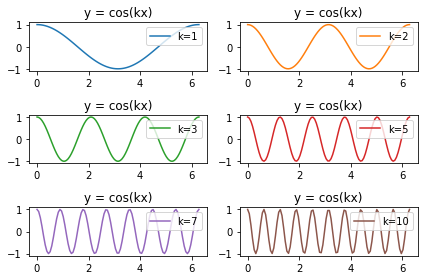

In [121]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax,color in zip(k_list, axs_flat, tcolors.keys()):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}", c=color)
    ax.legend(loc="upper right")
    ax.set(title="y = cos(kx)")

fig.tight_layout()

Here we add a title to the entire figure.

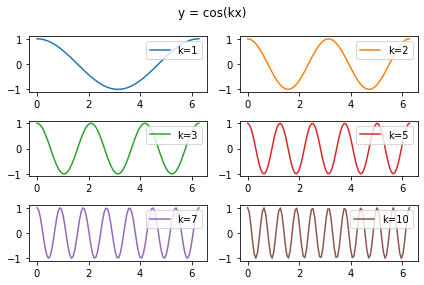

In [122]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax,color in zip(k_list, axs_flat, tcolors.keys()):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}", c=color)
    ax.legend(loc="upper right")
    
fig.suptitle("y = cos(kx)")
fig.tight_layout()

The default styling in Matplotlib can be replaced with a variety of different pre-defined options.  I think big improvements can be made by setting different styles.  The following line will change all future Matplotlib calls until you restart the kernel.  The style option I use most often is "seaborn-darkgrid".  (Seaborn itself is a very nice plotting library; Seaborn is built on Matplotlib.)

In [123]:
plt.style.use('seaborn-darkgrid')

The following code is verbatim the same as the code above.  I think the resulting figure looks a lot nicer with the Seaborn styling.

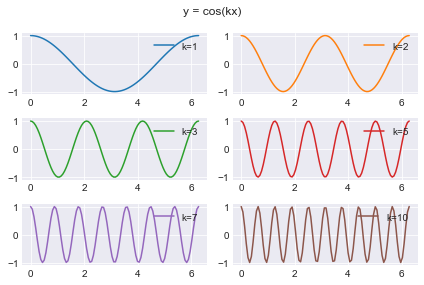

In [124]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax,color in zip(k_list, axs_flat, tcolors.keys()):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}", c=color)
    ax.legend(loc="upper right")
    
fig.suptitle("y = cos(kx)")
fig.tight_layout()

Here is a list of all the available plotting styles.

In [125]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Here is another pre-defined style I like, called "ggplot".  (The "gg" in "ggplot" stands for "grammar of graphics", which is an approach towards plotting used by many of my favorite Python plotting libraries, such as Altair, Plotly, and Seaborn.  The original ggplot plotting library was for the **R programming language**.)

In [126]:
plt.style.use('ggplot')

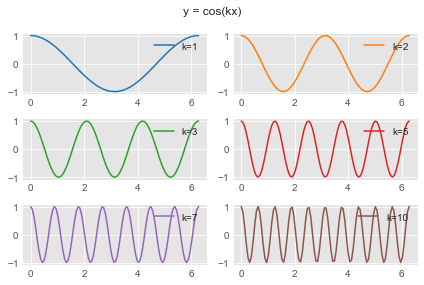

In [127]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax,color in zip(k_list, axs_flat, tcolors.keys()):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}", c=color)
    ax.legend(loc="upper right")
    
fig.suptitle("y = cos(kx)")
fig.tight_layout()

As one last example, let's choose random colors.  There are only 10 colors that are part of the `TABLEAU_COLORS` dictionary, but there are many more that are part of the `CSS4_COLORS` dictionary.

In [128]:
from matplotlib.colors import TABLEAU_COLORS as tcolors

In [129]:
len(tcolors)

10

In [130]:
from matplotlib.colors import TABLEAU_COLORS as tcolors, CSS4_COLORS as ccolors

In [131]:
len(ccolors)

148

These `CSS4_COLORS` include color names that are recognized in html, for example.

In [132]:
ccolors

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

Let's see how we can choose six random colors from this `CSS4_COLORS` dictionary.

In [133]:
rng = np.random.default_rng()

We will use the `choice` method of `rng` to choose six of these random colors.  It is not obvious to me why the following does not work.

In [134]:
colors = rng.choice(ccolors.keys(), size=len(k_list))

ValueError: a must an array or an integer

To fix the error, we convert `ccolors.keys()` to a list.

In [135]:
colors = rng.choice(list(ccolors.keys()), size=len(k_list))

Here are the six colors chosen in this case.  (If you run the code, you'll get different colors, because we haven't specified a `seed` when we instantiated the random number generator.)

In [136]:
colors

array(['mistyrose', 'darkslategrey', 'lightslategray', 'orange',
       'hotpink', 'goldenrod'], dtype='<U20')

Here we are using the randomly chosen colors.  We replace the `tcolors.keys()` in the `zip` with our `colors` NumPy array we just created.

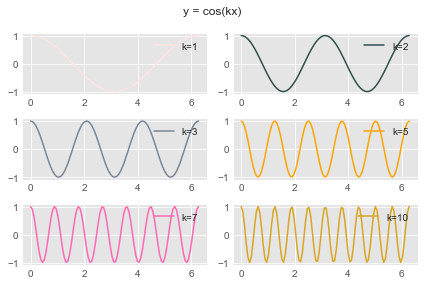

In [137]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax,color in zip(k_list, axs_flat, colors):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}", c=color)
    ax.legend(loc="upper right")
    
fig.suptitle("y = cos(kx)")
fig.tight_layout()

There is certainly much more we could do involving customizations of Matplotlib plots, but we are going to go on to a new topic, Newton's Method.